In [38]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
# add Code folder
import sys
sys.path.append('../qdarts')

# import main class and plotting function
from experiment import Experiment
from plotting import plot_polytopes

#reload file


# import standard libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [40]:
# Define the system

#All capacitances are given in aF
N = 2 #number of dots   
C_DD=20* np.eye((N))/2 #The self-capacitance of each dot, NOTE: factor of 2 due to symmetrization
C_DD[0,1] = 4 #capacitance between dot 0 and dot 1 (Left double dot) 
C_DD[1,0] = 7 #capacitance between dot 3 and dot 4 (Right double dot)


C_DG=4*np.eye(N) #dot-to-gate capacitances 


# Definition of the tunnel couplings in eV 
# NOTE: we use the convention that tc is the energy gap at avoided crossing H = tc/2 sx
tunnel_couplings = np.zeros((N,N))
tunnel_couplings[0,1] = 100*1e-6
tunnel_couplings[1,0] = 100*1e-6

In [41]:
capacitance_config = {
        "C_DD" : C_DD,  #dot-dot capacitance matrix
        "C_Dg" : C_DG,  #dot-gate capacitance matrix
        "ks" : None       #distortion of Coulomb peaks. NOTE: If None -> constant size of Coublomb peak 
}

tunneling_config = {
        "tunnel_couplings": tunnel_couplings, #tunnel coupling matrix
        "temperature": 0.1,                   #temperature in Kelvin
        "energy_range_factor": 5,  #energy scale for the Hamiltonian generation. NOTE: Smaller -> faster but less accurate computation 
}
sensor_config = {
        "sensor_dot_indices": [],  #Indices of the sensor dots
        "sensor_detunings": [],  #Detuning of the sensor dots
        "noise_amplitude": {"fast_noise": 0.8*1e-6, "slow_noise": 1e-8}, #Noise amplitude for the sensor dots in eV
        "peak_width_multiplier": 15,  #Width of the sensor peaks in the units of thermal broadening m *kB*T/0.61.
}


In [42]:
experiment = Experiment(capacitance_config, tunneling_config, sensor_config)

EXPERIMENT INITIALIZED
-----------------------

                Capacitance model deployed with the following parameters:
                Dot-dot capacitances: 
                [[10.00000 4.00000]
 [7.00000 10.00000]]
                Dot-gate capacitances: 
                [[4.00000 0.00000]
 [0.00000 4.00000]]
                Size of Coulomb peaks V[n] is constant
                

            Sensor model deployed with the following parameters:   
            Sensor dot indices: []
            Sensor detunings: [] meV
            Coulomb peak width: 0.41 meV
            Slow noise amplitude: 0.01 ueV
            Fast noise amplitude: 0.8 ueV
            

            Tunneling model deployed with the following parameters:
            Tunneling matrix:
            [[0.00000 0.00010]
 [0.00010 0.00000]]
            Temperature: 0.1 K
            Energy range factor: 5
            


In [43]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})


In [44]:
#Show the same transition with gate virtualisation
xV, yV, csd_dataV, polytopesV, sensors ,_ = experiment.generate_CSD(
                                x_voltages = np.linspace(-0.02, 0.05, 200),  #V
                                y_voltages = np.linspace(-0.02, 0.05, 200),  #V
                                plane_axes = [[1,1],[0,1]],
                                target_transition = [-1,1],
                                target_state = [1,1],
                                compute_polytopes =  True,                  
                                use_virtual_gates= False,
                                use_sensor_signal = True,
                                insitu_axis = [1,-1])

TypeError: generate_CSD() got an unexpected keyword argument 'insitu_axis'

In [17]:
sensors[:,:,0].shape

(200, 200)

In [24]:
sensors[:,:,0]

array([[0.00000, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.00000],
       [0.00000, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.00000],
       [0.00000, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.00000],
       ...,
       [0.00000, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.00000],
       [0.00000, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.00000],
       [0.00000, 0.00000, 0.00000, ..., 0.00000, 0.00000, 0.00000]])

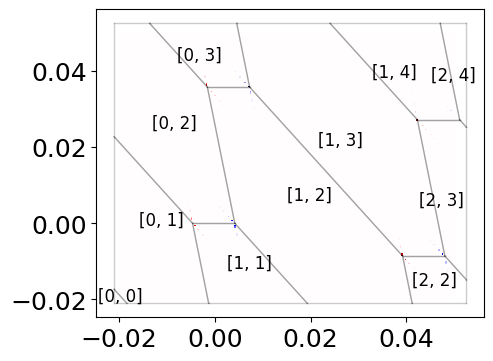

In [36]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(5,4))
plt.pcolormesh(xV, yV, sensors[:,:,0], cmap = "seismic", vmin=-0.5, vmax=0.5)   
#plt.pcolormesh(xV, yV, csd_dataV) 
plot_polytopes(ax, polytopesV, axes_rescale=1, fontsize = 12, alpha = 0.2, color="k")
    


### Fig 8: Tunnel coupling and sensor compensation

In the last example we show the effect of tunnel coupling on the charge stability diagram, manifesting itself as a level repulsin. It is controlled by the parameter tc in the device configuration file. Additionally, we show how the sensor compensation works.

In [20]:
# Plot without sensor compensation
%load_ext autoreload
%autoreload 2
xtc, ytc, CSD_data, polytopestc, sensor_signaltc, _ = experiment.generate_CSD(
                                x_voltages = np.linspace(-0.004, 0.002, 100),
                                y_voltages = np.linspace(-0.003, 0.003, 100),
                                plane_axes = [[0,0,1,0,0,0],[0,0,0,1,0,0]],
                                target_state = [2,1,3,2,4,4], 
                                target_transition = [0,0,1,-1,0,0],
                                compute_polytopes = True,
                                compensate_sensors = False,
                                use_virtual_gates = False,
                                use_sensor_signal=True
                                )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


v_offset found: [0.02796662 0.01679969 0.03875483 0.01674422 0.04986768 0.04964416]


In [21]:
# Plot with sensor compensation
xtcC, ytcC, CSD_data, polytopestcC, sensor_signaltcC, _ = experiment.generate_CSD(
                                x_voltages = np.linspace(-0.004, 0.002, 100),
                                y_voltages = np.linspace(-0.003, 0.003, 100),
                                plane_axes = [[0,0,1,0,0,0],[0,0,0,1,0,0]],
                                target_state = [2,1,3,2,4,4], 
                                target_transition = [0,0,-1,1,0,0],
                                compute_polytopes = True,
                                compensate_sensors = True,
                                use_virtual_gates = False,
                                use_sensor_signal=True
                                )

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
v_offset found: [0.02791077 0.01643804 0.02826617 0.02896927]


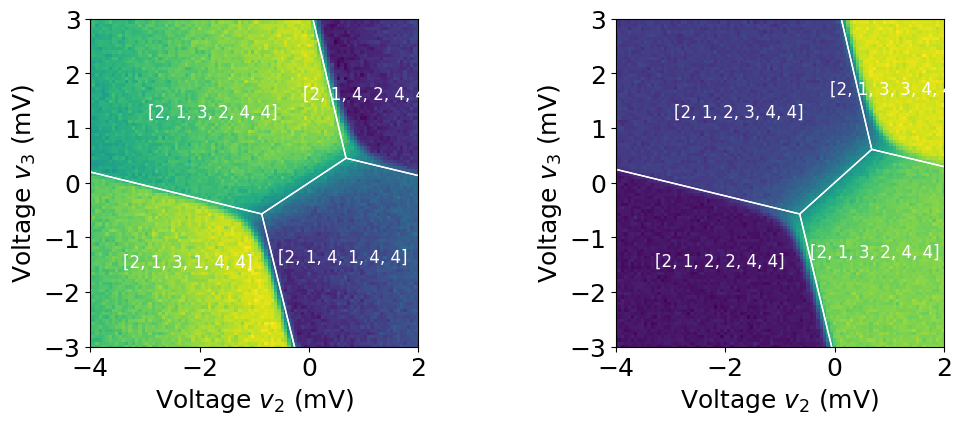

In [22]:

# Create a figure
fig = plt.figure(figsize=(10, 4))


# Define the grid
gs = gridspec.GridSpec(1, 2, width_ratios=[1.3, 1.3])
plt.subplots_adjust(wspace=0.3, top = 0.98, bottom = 0.16, left = 0.06, right = 0.99)

#plot without sensor compensation
ax0 = plt.subplot(gs[0])
ax0.pcolormesh(1e3*xtc,1e3*ytc,sensor_signaltc[:,:,0])
plot_polytopes(ax0, polytopestc, axes_rescale=1e3, fontsize = 12) 
ax0.set_xlim(xtc[0]*1e3,xtc[-1]*1e3)
ax0.set_ylim(ytc[0]*1e3,ytc[-1]*1e3)
ax0.set_xlabel('Voltage $v_2$ (mV)')
ax0.set_ylabel('Voltage $v_3$ (mV)')
ax0.set_aspect('equal')

#plot with sensor compensation
ax1 = plt.subplot(gs[1])
ax1.pcolormesh(1e3*xtcC,1e3*ytcC,sensor_signaltcC[:,:,0])
plot_polytopes(ax1, polytopestcC, axes_rescale=1e3, fontsize = 12)
ax1.set_xlim(xtcC[0]*1e3,xtcC[-1]*1e3)
ax1.set_ylim(ytcC[0]*1e3,ytcC[-1]*1e3)
ax1.set_xlabel('Voltage $v_2$ (mV)')
ax1.set_ylabel('Voltage $v_3$ (mV)')
ax1.set_aspect('equal')


plt.savefig("figures/fig8.png")
